In [181]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import keras
import tensorflow as tf
import glob

classes = 17

def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
#     img = cv2.medianBlur(img,5)
#     img = cv2.GaussianBlur(img,(5,5),0)
#     img = cv2.bilateralFilter(img,9,75,75)
    return img

def get_im_fuz(img):
    # Load as grayscale
#     img = cv2.imread(path, 0)
#     img = cv2.medianBlur(img,5)
    img = cv2.GaussianBlur(img,(5,5),0)
#     img = cv2.bilateralFilter(img,9,75,75)
    return img

# to show image
def show_img(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.show()

def load_train():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/train"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

def load_test():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/test"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"t/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

def load_test_fuz():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/test"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"t/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im_fuz(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

avgg = 1/(classes-1)

def count_(p):
    l = sorted(dict(zip(p,it)),reverse=True)
    cc = 0
    for i in range(3):
        if l[i] > avgg:
            cc += 1
    return cc

x,y = load_train()
tx , ty = load_test()

x_n = np.array(x)
y_n = np.array(y)
ty_n = np.array(ty)
tx_n = np.array(tx)
x_n = x_n.astype(float) / 255
tx_n = tx_n.astype(float) / 255

In [2]:
tx

[array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253,
         246, 233, 231, 235, 247, 253, 255, 255, 254, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 252,
         232, 217, 213, 201, 229, 249, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 252, 244,
         215, 126, 181, 191, 198, 238, 253, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 249, 229,
         159, 153, 122, 204, 171, 218, 247, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 253, 241, 210,
         139, 212, 169, 157, 187, 190, 235, 252, 254, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 250, 227, 164,
         177, 217, 216, 141, 208, 17

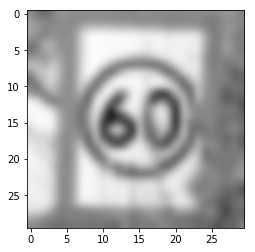

270

In [150]:
show_img(tx_n[17])
len(x)

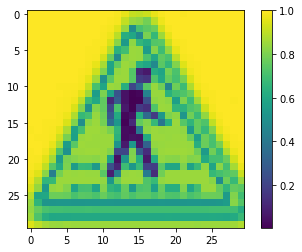

In [4]:
plt.figure()
plt.imshow(tx_n[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [166]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,30)),
    keras.layers.Dense(640, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.softmax)
])

In [56]:
y_n

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12

In [167]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [168]:
model.fit(x_n, y_n, epochs=75)

Epoch 1/75
270/270 [==============================] - 0s 543us/step - loss: 2.8946 - accuracy: 0.1148
Epoch 2/75
270/270 [==============================] - 0s 253us/step - loss: 2.3468 - accuracy: 0.3222
Epoch 3/75
270/270 [==============================] - 0s 286us/step - loss: 1.9724 - accuracy: 0.4815
Epoch 4/75
270/270 [==============================] - 0s 291us/step - loss: 1.7064 - accuracy: 0.5185
Epoch 5/75
270/270 [==============================] - 0s 341us/step - loss: 1.3737 - accuracy: 0.6148
Epoch 6/75
270/270 [==============================] - 0s 403us/step - loss: 1.1706 - accuracy: 0.6704
Epoch 7/75
270/270 [==============================] - 0s 452us/step - loss: 0.9682 - accuracy: 0.7407
Epoch 8/75
270/270 [==============================] - 0s 425us/step - loss: 0.8562 - accuracy: 0.7667
Epoch 9/75
270/270 [==============================] - 0s 427us/step - loss: 0.7466 - accuracy: 0.8296
Epoch 10/75
270/270 [==============================] - 0s 307us/step - loss: 0.686

In [169]:
loss, acc = model.evaluate(tx_n, ty_n)
print('Test accuracy:', acc)

80/80 [==============================] - 0s 548us/step
Test accuracy: 0.7875000238418579


In [9]:
predictions = model.predict(tx_n)
len(predictions)

80

In [27]:
np.argmax(predictions[66])
len(predictions)

80

In [52]:
it = []
for k in range(16):
    it.append(k)
it

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [180]:
itm = 66
avgg = np.average(predictions[itm])
print(np.argmax(predictions[itm]))
print()
print(predictions[itm])
print(ty_n[itm])
print(sorted((zip(predictions[itm],it)),reverse=True))
kkk,vvv = zip(*sorted((zip(predictions[itm],it)),reverse=True))
print(kkk)
for mm in range(80):
    print(str(mm) + " >>> " + str(sorted(dict(zip(predictions[mm],it)),reverse=True)[0]))
# zip(predictions[itm],it)[0]

4

[4.1342139e-02 3.2989450e-10 1.9604016e-08 1.1892581e-06 6.1350149e-01
 2.3943952e-03 2.8929624e-06 4.1050362e-06 8.0271020e-05 4.8583499e-04
 2.8581170e-02 1.9733486e-01 2.1068838e-06 3.9381299e-02 4.3186401e-03
 7.2569616e-02]
13
[(0.6135015, 4), (0.19733486, 11), (0.072569616, 15), (0.04134214, 0), (0.0393813, 13), (0.02858117, 10), (0.00431864, 14), (0.0023943952, 5), (0.000485835, 9), (8.027102e-05, 8), (4.105036e-06, 7), (2.8929624e-06, 6), (2.1068838e-06, 12), (1.1892581e-06, 3), (1.9604016e-08, 2), (3.298945e-10, 1)]
(0.6135015, 0.19733486, 0.072569616, 0.04134214, 0.0393813, 0.02858117, 0.00431864, 0.0023943952, 0.000485835, 8.027102e-05, 4.105036e-06, 2.8929624e-06, 2.1068838e-06, 1.1892581e-06, 1.9604016e-08, 3.298945e-10)
0 >>> 0.9990096
1 >>> 0.9971085
2 >>> 0.9990096
3 >>> 0.9758725
4 >>> 0.9988483
5 >>> 0.9999201
6 >>> 0.99989533
7 >>> 0.5796757
8 >>> 0.9999931
9 >>> 0.99912935
10 >>> 0.50251913
11 >>> 0.3995028
12 >>> 0.7398659
13 >>> 0.9956195
14 >>> 0.48527882
15 >

In [62]:
v = 80

In [86]:
tx , ty = load_test()
for i in range(0,80):
    print("{a:2d}".format(a=i)+": "+"{a:2d}".format(a=ty_n[i])+" >>> "+str(np.argmax(predictions[i])))
    if(ty_n[i]!=np.argmax(predictions[i])):
        tx[i] = get_im_fuz(tx[i])
        v -= 1
tx_n = np.array(tx)
tx_n = tx_n.astype(float) / 255
print(v/80)

 0:  0 >>> 0
 1:  0 >>> 0
 2:  0 >>> 0
 3:  0 >>> 0
 4:  0 >>> 0
 5:  1 >>> 1
 6:  1 >>> 1
 7:  1 >>> 1
 8:  1 >>> 1
 9:  1 >>> 1
10:  2 >>> 2
11:  2 >>> 8
12:  2 >>> 10
13:  2 >>> 2
14:  2 >>> 2
15:  3 >>> 3
16:  3 >>> 3
17:  3 >>> 3
18:  3 >>> 3
19:  3 >>> 3
20:  4 >>> 4
21:  4 >>> 4
22:  4 >>> 4
23:  4 >>> 4
24:  4 >>> 9
25:  5 >>> 5
26:  5 >>> 5
27:  5 >>> 5
28:  5 >>> 5
29:  5 >>> 5
30:  6 >>> 2
31:  6 >>> 6
32:  6 >>> 6
33:  6 >>> 3
34:  6 >>> 3
35:  7 >>> 10
36:  7 >>> 7
37:  7 >>> 2
38:  7 >>> 7
39:  7 >>> 7
40:  8 >>> 8
41:  8 >>> 8
42:  8 >>> 8
43:  8 >>> 8
44:  8 >>> 8
45:  9 >>> 9
46:  9 >>> 9
47:  9 >>> 9
48:  9 >>> 9
49:  9 >>> 9
50: 10 >>> 10
51: 10 >>> 10
52: 10 >>> 10
53: 10 >>> 10
54: 10 >>> 10
55: 11 >>> 13
56: 11 >>> 11
57: 11 >>> 10
58: 11 >>> 11
59: 11 >>> 11
60: 12 >>> 12
61: 12 >>> 12
62: 12 >>> 12
63: 12 >>> 12
64: 12 >>> 12
65: 13 >>> 13
66: 13 >>> 4
67: 13 >>> 6
68: 13 >>> 13
69: 13 >>> 11
70: 14 >>> 11
71: 14 >>> 14
72: 14 >>> 13
73: 14 >>> 14
74: 14 >>> 14


In [179]:
tx , ty = load_test()
missess = 0
act_misses = 0
for i in range(0,80):
    if(ty_n[i]!=np.argmax(predictions[i])):
        act_misses += 1
    pre_sorted = sorted((zip(predictions[i],it)),reverse=True)
    cc, vv = zip(*pre_sorted)
    pre_sorted_dict = sorted(dict(zip(predictions[i],it)),reverse=True)
    cnt_per = 0
    for m in range(3):
        cnt_per += pre_sorted_dict[m]
#     print(cnt_per)
#     if(np.max(predictions[i]) < 0.80 and count_(predictions[i]) >= 3 and cnt_per < 0.90):
    if(np.max(predictions[i]) < 0.80 and count_(predictions[i]) >= 3):
        missess += 1
        if pre_sorted_dict[1] > pre_sorted_dict[0]/2:
            print("{a:2d}".format(a=i)+": "+"{a:2d}".format(a=ty_n[i])+" >>> "+str(np.argmax(predictions[i]))+" >>> Might be misclassified")
#             print("{a:2d}".format(a=i)+": "+"{a:2d}".format(a=ty_n[i])+" >>> "+str(np.argmax(predictions[i]))+" Might be misclassified" + " " +str(vv[1]))
#         print(np.max(predictions[i]))
        else:
            print("{a:2d}".format(a=i)+": "+"{a:2d}".format(a=ty_n[i])+" >>> "+str(np.argmax(predictions[i]))+" Might be misclassified")
    else:
        print("{a:2d}".format(a=i)+": "+"{a:2d}".format(a=ty_n[i])+" >>> "+str(np.argmax(predictions[i])) + " >>> Strong")
print("Misses Found: "+str(missess))
print("Actual Misses: "+str(act_misses))
#     if(ty_n[i]!=np.argmax(predictions[i])):
#         tx[i] = get_im_fuz(tx[i])
#         v -= 1
# tx_n = np.array(tx)
# tx_n = tx_n.astype(float) / 255
# print(v/80)

 0:  0 >>> 0 >>> Strong
 1:  0 >>> 0 >>> Strong
 2:  0 >>> 0 >>> Strong
 3:  0 >>> 0 >>> Strong
 4:  0 >>> 0 >>> Strong
 5:  1 >>> 1 >>> Strong
 6:  1 >>> 1 >>> Strong
 7:  1 >>> 1 >>> Strong
 8:  1 >>> 1 >>> Strong
 9:  1 >>> 1 >>> Strong
10:  2 >>> 2 >>> Strong
11:  2 >>> 8 Might be misclassified
12:  2 >>> 10 >>> Strong
13:  2 >>> 2 >>> Strong
14:  2 >>> 2 Might be misclassified
15:  3 >>> 3 >>> Strong
16:  3 >>> 3 >>> Strong
17:  3 >>> 3 >>> Strong
18:  3 >>> 3 >>> Strong
19:  3 >>> 3 >>> Strong
20:  4 >>> 4 >>> Strong
21:  4 >>> 4 >>> Strong
22:  4 >>> 4 >>> Strong
23:  4 >>> 4 >>> Strong
24:  4 >>> 9 >>> Strong
25:  5 >>> 5 >>> Strong
26:  5 >>> 5 >>> Strong
27:  5 >>> 5 >>> Strong
28:  5 >>> 5 >>> Strong
29:  5 >>> 5 >>> Strong
30:  6 >>> 2 >>> Strong
31:  6 >>> 6 >>> Strong
32:  6 >>> 6 >>> Strong
33:  6 >>> 3 >>> Strong
34:  6 >>> 3 >>> Strong
35:  7 >>> 10 Might be misclassified
36:  7 >>> 7 >>> Strong
37:  7 >>> 2 >>> Strong
38:  7 >>> 7 >>> Strong
39:  7 >>> 7 >>> Strong
40